## Importando Bibliotecas

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Carregando a Base

In [26]:
# Caso 
df = pd.read_csv("./Bases/base.csv")

## Análise Exploratória

In [27]:
# Convertendo Coluna date para datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Ordenar o dataframe por state e date para garantir que as datas estejam em ordem
df = df.sort_values(by=['state', 'date'])

# Agrupar por estado e calcular a diferença dia a dia
df['confirmed_daily'] = df.groupby('state')['confirmed'].diff().fillna(df['confirmed'])
df['deaths_daily'] = df.groupby('state')['deaths'].diff().fillna(df['deaths'])
df['death_rate_daily'] = df['deaths_daily'] / df['confirmed_daily']

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

Verificando as colunas presentes no df:

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19762 entries, 1455 to 17593
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            19762 non-null  datetime64[ns]
 1   state                           19762 non-null  object        
 2   confirmed                       19762 non-null  int64         
 3   deaths                          19762 non-null  int64         
 4   order_for_place                 19762 non-null  int64         
 5   is_last                         19762 non-null  bool          
 6   estimated_population            19762 non-null  float64       
 7   confirmed_per_100k_inhabitants  19756 non-null  float64       
 8   death_rate                      19762 non-null  float64       
 9   confirmed_daily                 19762 non-null  float64       
 10  deaths_daily                    19762 non-null  float64       
 11  deat

In [29]:
df.describe().T

c:\Users\filip\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,min,25%,50%,75%,max,std
date,19762,2021-03-17 23:14:49.343183872,2020-02-25 00:00:00,2020-09-14 00:00:00,2021-03-17 00:00:00,2021-09-17 00:00:00,2022-03-27 00:00:00,NaN
confirmed,19762.0,465498.105354,0.0,85816.5,244257.5,539522.75,5232374.0,688475.302036
deaths,19762.0,12465.451624,0.0,1842.0,6043.5,13558.5,167110.0,21652.086659
order_for_place,19762.0,366.612337,1.0,183.25,366.0,549.0,750.0,211.548197
estimated_population,19762.0,7913264.095233,631181.0,2809394.0,4064052.0,9616621.0,46289333.0,9188175.447382
confirmed_per_100k_inhabitants,19756.0,6951.675635,0.00216,2355.830548,6128.78199,10544.970693,25521.03172,5490.161951
death_rate,19762.0,0.02639,0.0,0.0195,0.0234,0.0281,0.2222,0.014829
confirmed_daily,19762.0,1510.461492,-12028.0,189.0,618.0,1535.75,105200.0,3032.264866
deaths_daily,19762.0,33.354873,-84.0,3.0,11.0,31.0,1389.0,74.475117
death_rate_daily,19574.0,inf,-0.972727,0.009317,0.01989,0.035831,inf,NaN


- Verificando Nulos

In [30]:
df.isnull().sum()

date                                0
state                               0
confirmed                           0
deaths                              0
order_for_place                     0
is_last                             0
estimated_population                0
confirmed_per_100k_inhabitants      6
death_rate                          0
confirmed_daily                     0
deaths_daily                        0
death_rate_daily                  188
dtype: int64

- Eliminando Duplicadas

In [31]:
df.drop_duplicates()

,date,state,confirmed,deaths,order_for_place,is_last,estimated_population,confirmed_per_100k_inhabitants,death_rate,confirmed_daily,deaths_daily,death_rate_daily
1455,2020-03-17,AC,3,0,1,False,894470.0,0.33539,0.0000,3.0,0.0,0.000000
1454,2020-03-18,AC,3,0,2,False,894470.0,0.33539,0.0000,0.0,0.0,NaN
1453,2020-03-19,AC,4,0,3,False,894470.0,0.44719,0.0000,1.0,0.0,0.000000
1452,2020-03-20,AC,7,0,4,False,894470.0,0.78259,0.0000,3.0,0.0,0.000000
1451,2020-03-21,AC,11,0,5,False,894470.0,1.22978,0.0000,4.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
17597,2022-03-21,TO,302166,4141,690,False,1590248.0,19001.18724,0.0137,300.0,1.0,0.003333
17596,2022-03-22,TO,302289,4141,691,False,1590248.0,19008.92188,0.0137,123.0,0.0,0.000000
17595,2022-03-23,TO,302387,4142,692,False,1590248.0,19015.08444,0.0137,98.0,1.0,0.010204
17594,2022-03-24,TO,302443,4142,693,False,1590248.0,19018.60590,0.0137,56.0,0.0,0.000000


##

## Análise Univariada

- Date

In [32]:
print(f"Date mínimo = {df['date'].min()}")
print(f"Date máximo = {df['date'].max()}")

Date mínimo = 2020-02-25 00:00:00
Date máximo = 2022-03-27 00:00:00


- estimated_population

Text(0.5, 1.0, 'Distribuição da População Estimada')

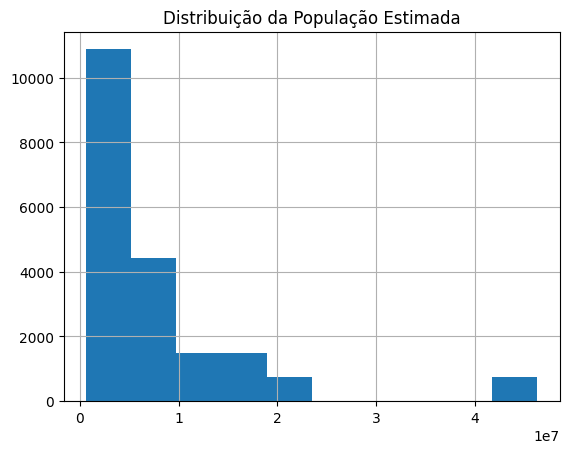

In [33]:
df['estimated_population'].hist()
plt.title('Distribuição da População Estimada')

- confirmed_daily e deaths_Daily

<Axes: >

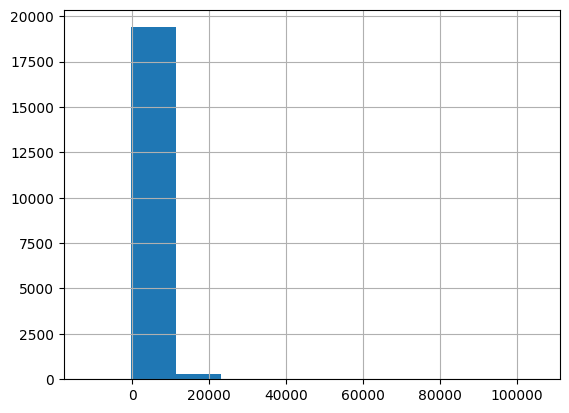

In [34]:
df['confirmed_daily'].hist()

<Axes: >

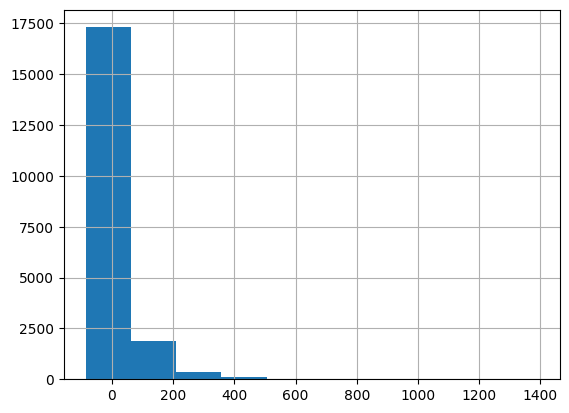

In [35]:
df['deaths_daily'].hist()

## Análise Bivariada

### Séries Temporais

#### Série Temporal por dia

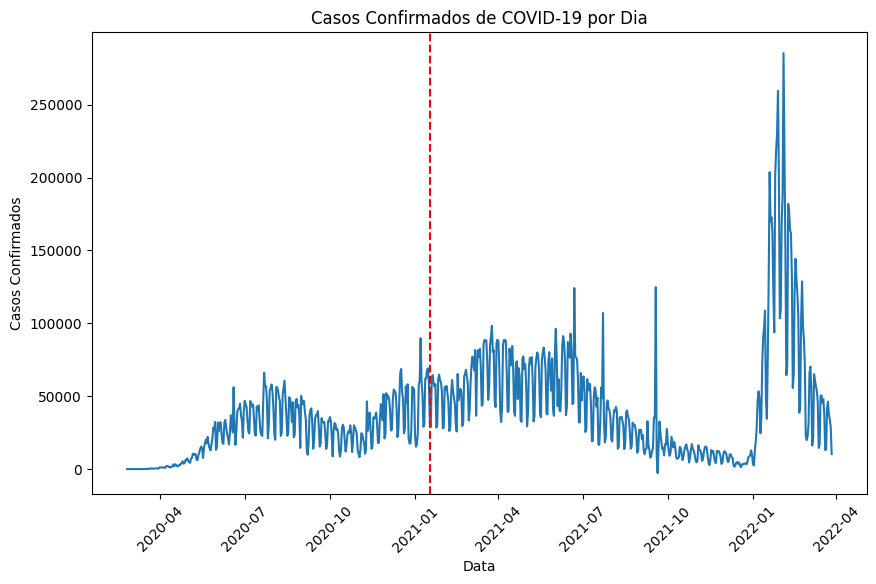

In [36]:
# Resampleando os dados por dia
df_resampled = df.resample('D', on='date').sum()

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='confirmed_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Casos Confirmados de COVID-19 por Dia')
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)

plt.show()


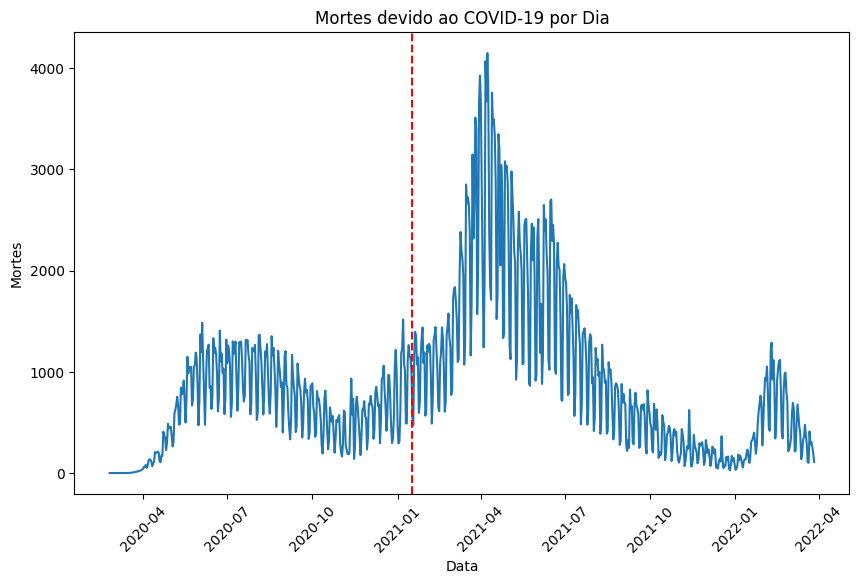

In [37]:
# Resampleando os dados por dia
df_resampled = df.resample('D', on='date').sum()

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='deaths_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Mortes devido ao COVID-19 por Dia')
plt.xlabel('Data')
plt.ylabel('Mortes')
plt.xticks(rotation=45)

plt.show()


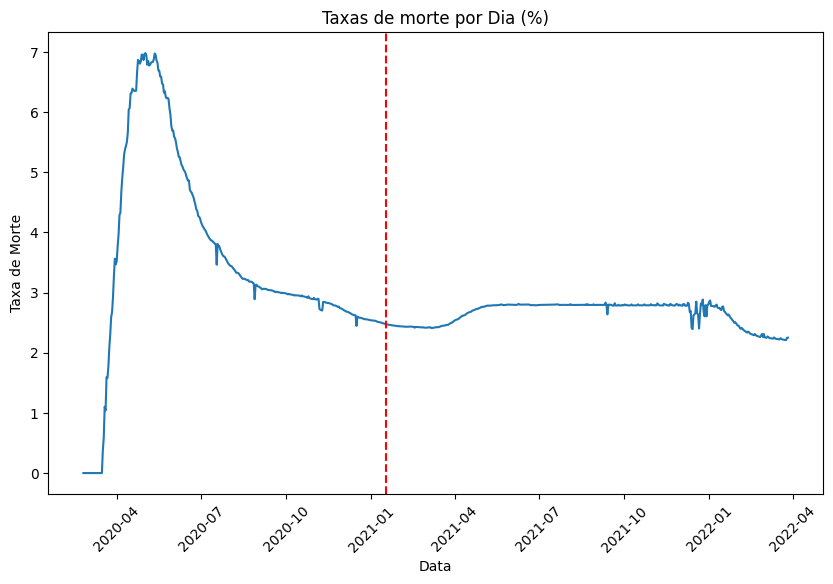

In [38]:
# Resampleando os dados por dia (soma dos casos e mortes diárias)
df_resampled = df.resample('D', on='date').sum()

# Calculando a taxa de morte diária (mortes diárias / casos confirmados diários)
df_resampled['death_rate_daily'] = 100*df_resampled['deaths'] / df_resampled['confirmed']

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='death_rate_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Taxas de morte por Dia (%)')
plt.xlabel('Data')
plt.ylabel('Taxa de Morte')
plt.xticks(rotation=45)

plt.show()

#### Série Temporal por Semana

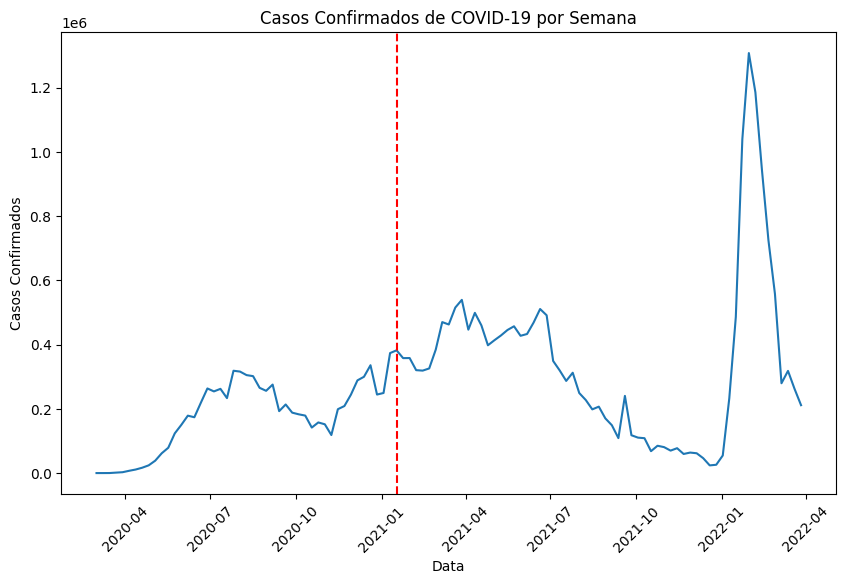

In [39]:
# Resampleando os dados por dia
df_resampled = df.resample('W', on='date').sum()

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='confirmed_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Casos Confirmados de COVID-19 por Semana')
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)

plt.show()


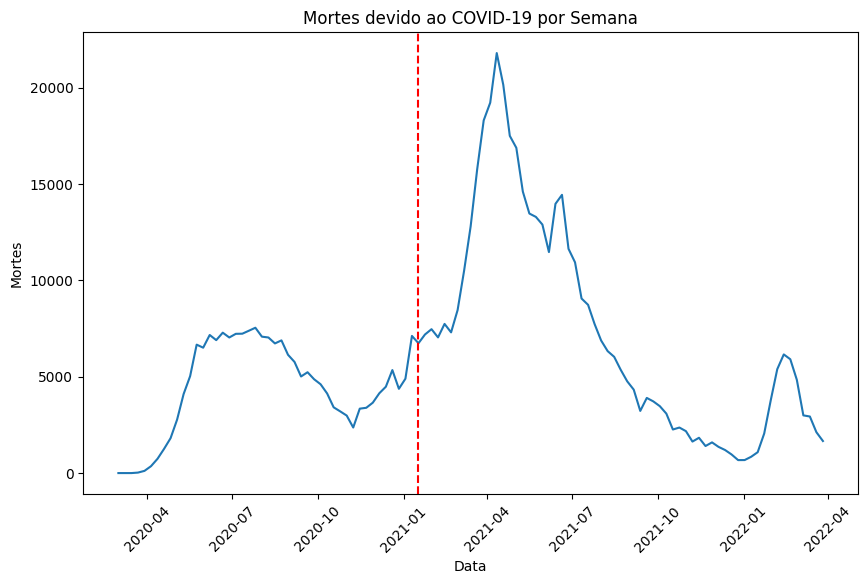

In [40]:
# Resampleando os dados por dia
df_resampled = df.resample('W', on='date').sum()

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='deaths_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Mortes devido ao COVID-19 por Semana')
plt.xlabel('Data')
plt.ylabel('Mortes')
plt.xticks(rotation=45)

plt.show()


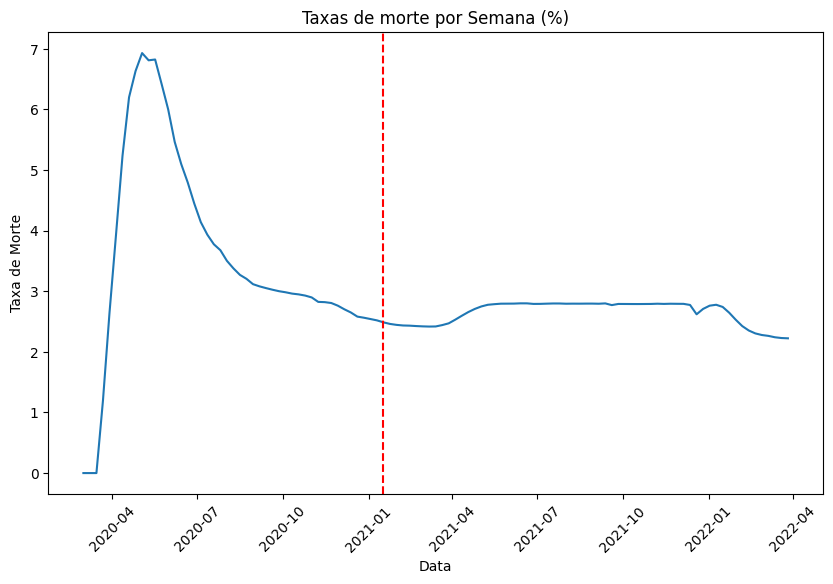

In [41]:
# Resampleando os dados por dia (soma dos casos e mortes diárias)
df_resampled = df.resample('W', on='date').sum()

# Calculando a taxa de morte diária (mortes diárias / casos confirmados diários)
df_resampled['death_rate_daily'] = 100*df_resampled['deaths'] / df_resampled['confirmed']

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='death_rate_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Taxas de morte por Semana (%)')
plt.xlabel('Data')
plt.ylabel('Taxa de Morte')
plt.xticks(rotation=45)

plt.show()

#### Série Temporal por mês

C:\Users\filip\AppData\Local\Temp\ipykernel_8084\437576797.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M', on='date').sum()


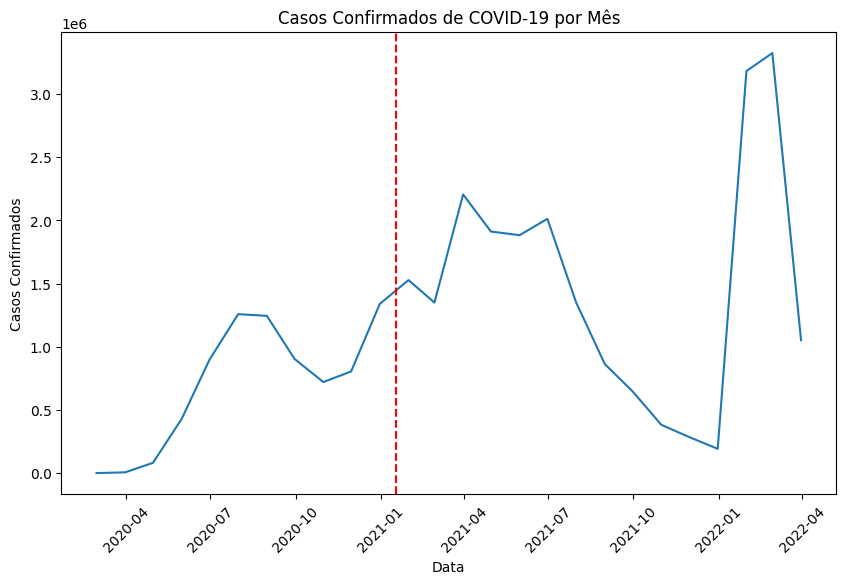

In [42]:
# Resampleando os dados por dia
df_resampled = df.resample('M', on='date').sum()

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='confirmed_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Casos Confirmados de COVID-19 por Mês')
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)

plt.show()


C:\Users\filip\AppData\Local\Temp\ipykernel_8084\515525062.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M', on='date').sum()


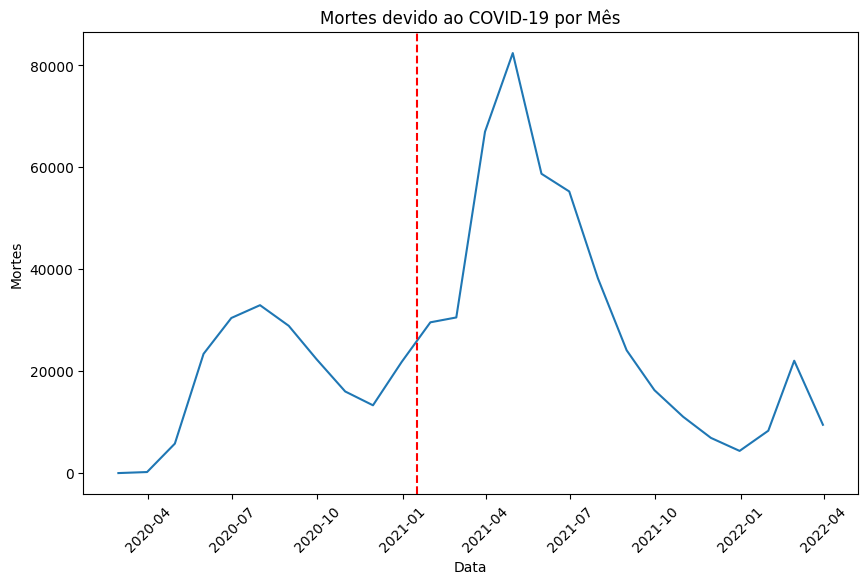

In [43]:
# Resampleando os dados por dia
df_resampled = df.resample('M', on='date').sum()

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='deaths_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Mortes devido ao COVID-19 por Mês')
plt.xlabel('Data')
plt.ylabel('Mortes')
plt.xticks(rotation=45)

plt.show()


C:\Users\filip\AppData\Local\Temp\ipykernel_8084\1415844574.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M', on='date').sum()


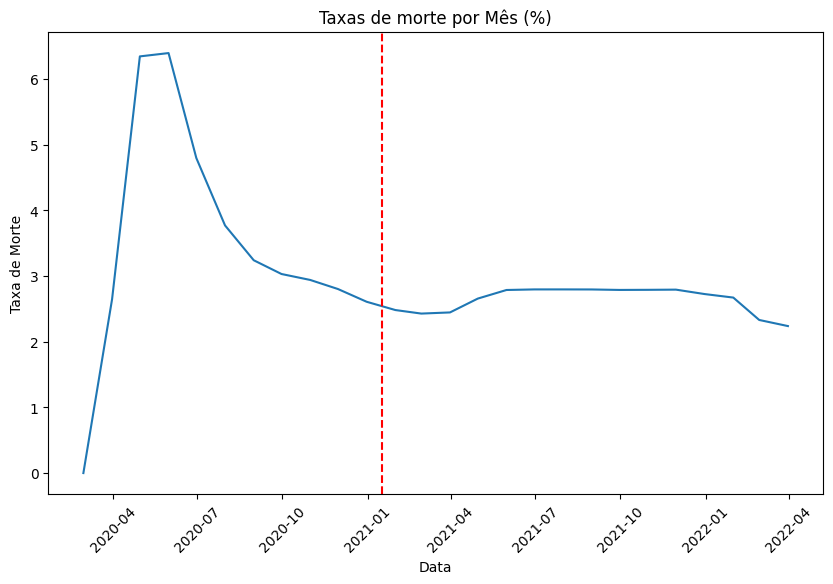

In [44]:
# Resampleando os dados por dia (soma dos casos e mortes diárias)
df_resampled = df.resample('M', on='date').sum()

# Calculando a taxa de morte diária (mortes diárias / casos confirmados diários)
df_resampled['death_rate_daily'] = 100*df_resampled['deaths'] / df_resampled['confirmed']

# Defina a data de início da vacinação no Brasil (exemplo: 17 de janeiro de 2021)
inicio_vacinacao = pd.to_datetime('2021-01-17')

# Plotando a série temporal com seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='death_rate_daily', data=df_resampled)

# Adicionando linha vertical para indicar o início da vacinação
plt.axvline(x=inicio_vacinacao, color='red', linestyle='--')

plt.title('Taxas de morte por Mês (%)')
plt.xlabel('Data')
plt.ylabel('Taxa de Morte')
plt.xticks(rotation=45)

plt.show()

### Correlação

- Desenvolvendo uma análise de correlação para entender onde as mortes podem estar acontecendo mais frequentemente

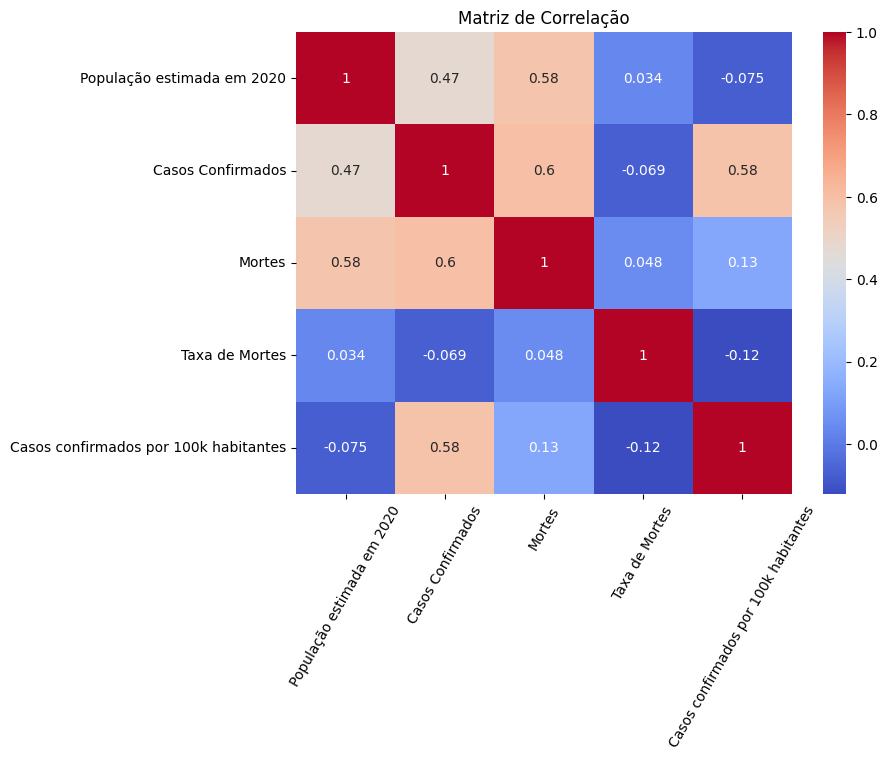

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Passo 1: Remover as colunas indesejadas
df_quant = df.drop(columns=['date','state', 'confirmed', 'deaths','order_for_place','death_rate', 'is_last', 'confirmed_per_100k_inhabitants'])

# Passo 2: Recalcular a métrica 'confirmed_per_100k_inhabitants'
df_quant['Casos confirmados por 100k habitantes'] = (df_quant['confirmed_daily'] / df_quant['estimated_population']) * 100000

# Passo 3: Renomear as colunas conforme necessário
df_quant = df_quant.rename(columns={
    'confirmed_daily': 'Casos Confirmados',
    'deaths_daily': 'Mortes',
    'death_rate_daily': 'Taxa de Mortes',
    'estimated_population': 'População estimada em 2020',
})

# Passo 4: Calcular a matriz de correlação
df_quant_corr = df_quant.corr()

# Passo 5: Gerar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_quant_corr, cmap='coolwarm', annot=True)
plt.xticks(rotation = 60)
plt.title('Matriz de Correlação')
plt.show()

Pode-se perceber que o número de mortes está diretamente correlacionado com o número de casos confirmados, o que acaba sendo algo óbvio. No entanto, a taxa de mortes (death_rate) é inversamente correlacionada o número de casos confirmados a cada 100k habitantes, o que é curioso. Essa correlação de 0.0177 sugere que a taxa de mortalidade depende de outros fatores, como qualidade do atendimento médico, demografia, e a presença de comorbidades, não estando diretamente conectada a quantidade de habitantes.

### Análises considerando Estado

#### Casos confirmados por estado

C:\Users\filip\AppData\Local\Temp\ipykernel_8084\2615002503.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='confirmed_daily', y='state', data=state_summary_sorted_confirmed, palette='viridis')


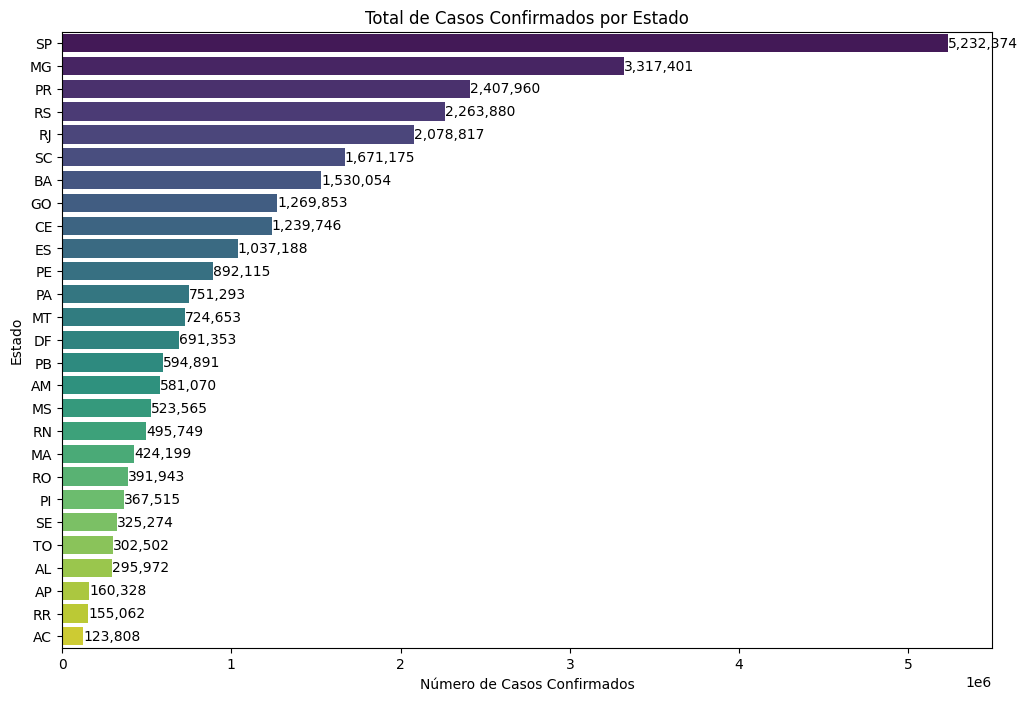

In [46]:
# Agregar os dados por estado
state_summary = df.groupby('state').agg({
    'confirmed_daily': 'sum',
    'deaths_daily': 'sum'
}).reset_index()

# Ordenar os estados pelo número de casos confirmados e mortes
state_summary_sorted_confirmed = state_summary.sort_values(by='confirmed_daily', ascending=False)
state_summary_sorted_deaths = state_summary.sort_values(by='deaths_daily', ascending=False)

# Função para adicionar rótulos aos gráficos de barras
def add_labels(ax, data, x_col, y_col):
    for index, value in enumerate(data[x_col]):
        ax.text(value, index, f'{int(value):,}', va='center', ha='left', fontsize=10)

# Plotar gráfico de barras para casos confirmados
plt.figure(figsize=(12, 8))
ax1 = sns.barplot(x='confirmed_daily', y='state', data=state_summary_sorted_confirmed, palette='viridis')
add_labels(ax1, state_summary_sorted_confirmed, 'confirmed_daily', 'state')
plt.title('Total de Casos Confirmados por Estado')
plt.xlabel('Número de Casos Confirmados')
plt.ylabel('Estado')
plt.show()


#### Mortes por Estado

C:\Users\filip\AppData\Local\Temp\ipykernel_8084\545198006.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='deaths_daily', y='state', data=state_summary_sorted_deaths, palette='magma')


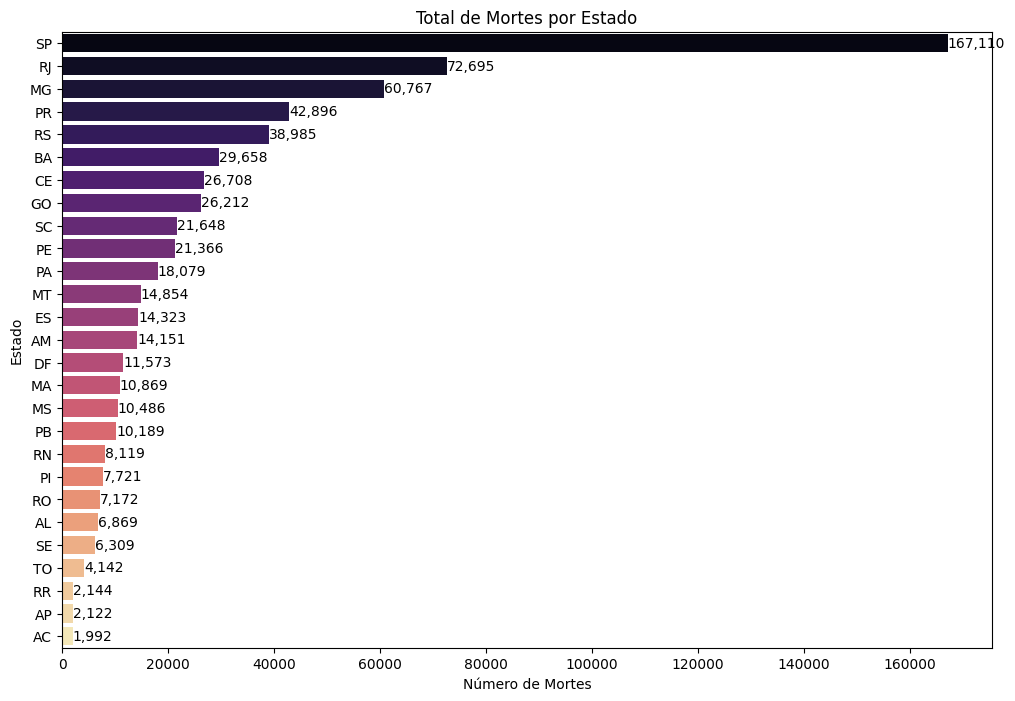

In [47]:
# Plotar gráfico de barras para mortes
plt.figure(figsize=(12, 8))
ax2 = sns.barplot(x='deaths_daily', y='state', data=state_summary_sorted_deaths, palette='magma')
add_labels(ax2, state_summary_sorted_deaths, 'deaths_daily', 'state')
plt.title('Total de Mortes por Estado')
plt.xlabel('Número de Mortes')
plt.ylabel('Estado')
plt.show();

#### Antes vs Depois da vacinação:

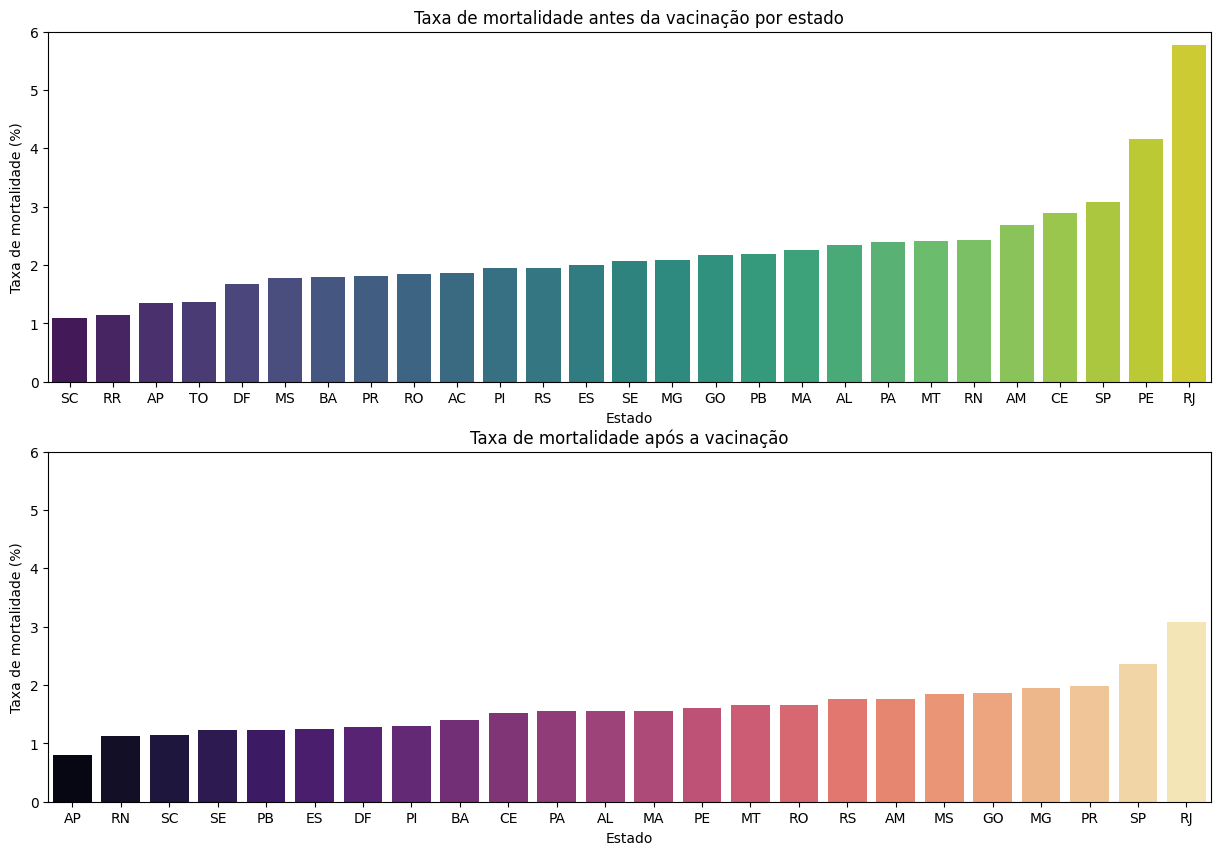

In [54]:
# Precisa revisão e explicoação do que está sendo feito.

df_per_state_20 = df.loc[df['date'] == inicio_vacinacao, :].reset_index(drop=True)
df_per_state_20['death_rate'] = 100*df_per_state_20['deaths'].combine(df_per_state_20['confirmed'], lambda x, y: x/y)

df_per_state_21 = pd.merge(df.loc[df['date'] == pd.to_datetime('31-12-2021', dayfirst=True), :].reset_index(drop=True), df_per_state_20, on='state', suffixes=['', '_20'])
df_per_state_21['deaths'] = df_per_state_21['deaths'] - df_per_state_21['deaths_20']

df_per_state_21['death_rate'] = 100*df_per_state_21['deaths'].combine(df_per_state_21['confirmed'], lambda x, y: x/y)

y_min = 0
y_max = 6  # Example range, adjust to fit your data

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.barplot(df_per_state_20.sort_values('death_rate'), x='state', y='death_rate', palette='viridis', hue='state', legend=False)
plt.title('Taxa de mortalidade antes da vacinação por estado')
plt.xlabel('Estado')
plt.ylabel('Taxa de mortalidade (%)')
plt.ylim(y_min, y_max)  # Set the same y-axis limits

plt.subplot(2, 1, 2)
sns.barplot(df_per_state_21.sort_values('death_rate'), x='state', y='death_rate', palette='magma', hue='state', legend=False)
plt.title('Taxa de mortalidade após a vacinação')
plt.xlabel('Estado')
plt.ylabel('Taxa de mortalidade (%)')
plt.ylim(y_min, y_max);  # Set the same y-axis limits

### Uma Análise sobre outliers em 'confirmed', 'deaths' e 'death_rate'


* A média (1510.46) é maior que a mediana (618.0), sugerindo uma distribuição um pouco enviesada na parte superior, pois existem locais que possuem um número extremamente alto de casos confirmados.
* Há uma necessidade de normalizar a base de dados, conforme se demonstram nos gráficos bloxplot abaixos.

In [49]:
# média de casos confirmads 
df['confirmed_daily'].mean()

np.float64(1510.461491751847)

In [50]:
# mediana de casos confirmads 
df['confirmed_daily'].median()

np.float64(618.0)

#### Boxplot

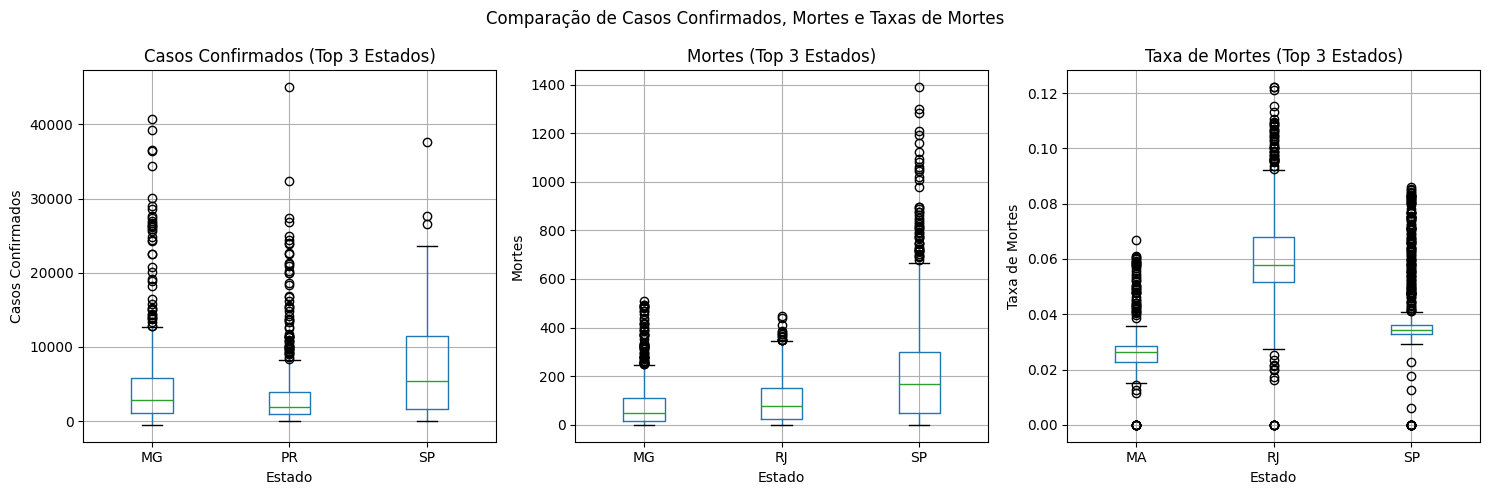

In [51]:
# Agrupar por estado e pegar o valor máximo (colunas cumulativas)
df_grouped = df.groupby('state').agg({
    'confirmed_daily': 'sum',
    'deaths_daily': 'sum'
}).reset_index()

# Calcular a taxa de mortes após a agregação
df_grouped['death_rate'] = df_grouped['deaths_daily'] / df_grouped['confirmed_daily']

# Identificar os 3 maiores estados para cada métrica
top_confirmed_states = df_grouped.nlargest(3, 'confirmed_daily')['state']
top_deaths_states = df_grouped.nlargest(3, 'deaths_daily')['state']
top_death_rate_states = df_grouped.nlargest(3, 'death_rate')['state']

# Filtrar os dados originais para esses estados
df_top_confirmed = df[df['state'].isin(top_confirmed_states)]
df_top_deaths = df[df['state'].isin(top_deaths_states)]
df_top_death_rate = df[df['state'].isin(top_death_rate_states)]

# Criar os subplots de boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot para casos confirmados
df_top_confirmed.boxplot(column='confirmed_daily', by='state', ax=axes[0])
axes[0].set_title('Casos Confirmados (Top 3 Estados)')
axes[0].set_xlabel('Estado')
axes[0].set_ylabel('Casos Confirmados')

# Boxplot para mortes
df_top_deaths.boxplot(column='deaths_daily', by='state', ax=axes[1])
axes[1].set_title('Mortes (Top 3 Estados)')
axes[1].set_xlabel('Estado')
axes[1].set_ylabel('Mortes')

# Boxplot para taxas de mortes
df_top_death_rate.boxplot(column='death_rate', by='state', ax=axes[2])
axes[2].set_title('Taxa de Mortes (Top 3 Estados)')
axes[2].set_xlabel('Estado')
axes[2].set_ylabel('Taxa de Mortes')

# Ajustar layout
plt.suptitle('Comparação de Casos Confirmados, Mortes e Taxas de Mortes')
plt.tight_layout()
plt.show()


* identificando Estados Semelhantes e Distintos:
    * Calcular a média de death_rate e confirmed_per_100k_inhabitants por estado e ao longo do tempo.
    * Usar uma medida de similaridade, como a correlação, para encontrar estados com comportamentos semelhantes.
    * Há uma forte correlação entre Estado x Mortalidade de alguns Estados com diferentes populações e localidades
    * Há uma forte correlação entre Estado x Casos Confirmados de alguns Estados com diferentes populações e localidades